In [9]:
from pandas_datareader import data # pip install pandas_datareader
import matplotlib.pyplot as plt    # pip install matplotlib
import pandas as pd                # pip install pandas
%matplotlib inline

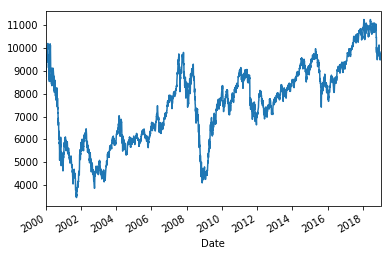

In [10]:
data = data.DataReader("^TWII", "yahoo", "2000-01-01","2019-01-01")
c = data['Close']
c.plot()

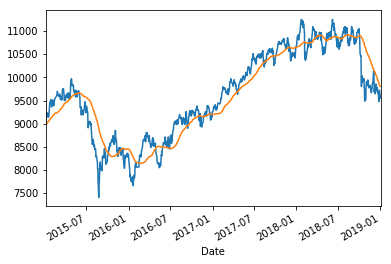

In [11]:
# 近60日收盤
c60 = c.rolling(60, min_periods=1).mean()

# 畫圖
c['2015':].plot()
c60['2015':].plot()

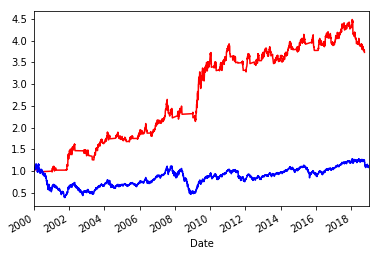

In [12]:
c60 = c.rolling(60, min_periods=1).mean()

# 買入訊號
signal = (c > c60)

# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')

In [13]:
pd.DataFrame({'c':c, 'c60':c60, '增長率':c.shift(-1)/c, 'signal':signal}).head()

,c,c60,增長率,signal
Date,,,,
2000-01-04,8756.549805,8756.549805,1.010657,False
2000-01-05,8849.870117,8803.209961,1.008154,True
2000-01-06,8922.030273,8842.816732,0.991912,True
2000-01-07,8849.870117,8844.580078,1.028557,True
2000-01-10,9102.599609,8896.183984,0.980712,True
